## 1. Setup and Load Data

##### 1.1 Install Imports and Dependencies

In [37]:
import tensorflow as tf
import cv2

In [38]:
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.18.0
OpenCV version: 4.10.0


In [39]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.8
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.55.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.68.0
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.29.0
jedi                         0.19.2
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.6.0



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [41]:
import os

In [42]:
os.listdir('Potato Pest Dataset')

['.DS_Store',
 'SL01 Agrotis ipsilon (Hufnagel)',
 'SL02 Amrasca devastans (Distant)',
 'SL03 Aphis gossypii Glover',
 'SL05 Bemisia tabaci (Gennadius)',
 'SL06 Brachytrypes portentosus Lichtenstein',
 'SL10 Epilachna vigintioctopunctata (Fabricius)',
 'SL15 Myzus persicae (Sulzer)',
 'SL17 Phthorimaea operculella (Zeller)']

In [43]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [44]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [45]:
# Avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

##### 1.2 Remove images 

In [46]:
import cv2 
import imghdr
from matplotlib import pyplot as plt 

In [47]:
data_dir = 'Potato Pest Dataset'

In [48]:
os.listdir(os.path.join(data_dir, 'SL15 Myzus persicae (Sulzer)'))

['Myzus persicae (Sulzer)_1.jpg',
 'Myzus persicae (Sulzer)_10.jpg',
 'Myzus persicae (Sulzer)_11.jpg',
 'Myzus persicae (Sulzer)_12.jpg',
 'Myzus persicae (Sulzer)_13.jpg',
 'Myzus persicae (Sulzer)_14.jpg',
 'Myzus persicae (Sulzer)_15.jpg',
 'Myzus persicae (Sulzer)_16.jpg',
 'Myzus persicae (Sulzer)_17.jpg',
 'Myzus persicae (Sulzer)_18.jpg',
 'Myzus persicae (Sulzer)_19.jpg',
 'Myzus persicae (Sulzer)_2.jpg',
 'Myzus persicae (Sulzer)_20.jpg',
 'Myzus persicae (Sulzer)_21.jpg',
 'Myzus persicae (Sulzer)_22.jpg',
 'Myzus persicae (Sulzer)_23.jpg',
 'Myzus persicae (Sulzer)_24.jpg',
 'Myzus persicae (Sulzer)_25.jpg',
 'Myzus persicae (Sulzer)_26.jpg',
 'Myzus persicae (Sulzer)_27.jpg',
 'Myzus persicae (Sulzer)_28.jpg',
 'Myzus persicae (Sulzer)_29.jpg',
 'Myzus persicae (Sulzer)_3.jpg',
 'Myzus persicae (Sulzer)_30.jpg',
 'Myzus persicae (Sulzer)_31.jpg',
 'Myzus persicae (Sulzer)_32.jpg',
 'Myzus persicae (Sulzer)_33.jpg',
 'Myzus persicae (Sulzer)_34.jpg',
 'Myzus persicae (Sulze

In [49]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [50]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    # Skip if it's not a directory
    if not os.path.isdir(class_path):
        continue
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image: {image_path}')

##### 1.3 Load Data

In [51]:
import numpy as np 
from matplotlib import pyplot as plt 

In [52]:
data = tf.keras.utils.image_dataset_from_directory('Potato Pest Dataset')

Found 494 files belonging to 8 classes.


In [53]:
data_iterator = data.as_numpy_iterator()

In [54]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [55]:
len(batch)
# Images represented as numpy arrays 
batch[0].shape

(32, 256, 256, 3)

In [56]:
class_names = {
    0: "SL15 Myzus persicae (Sulzer)",
    1: "SL17 Phthorimaea operculella (Zeller)",
    2: "SL01 Agrotis ipsilon (Hufnagel)",
    3: "SL05 Bemisia tabaci (Gennadius)",
    4: "SL10 Epilachna vigintioctopunctata (Fabricius)",
    5: "SL03 Aphis gossypii Glover",
    6: "SL06 Brachytrypes portentosus Lichtenstein",
    7: "SL02 Amrasca devastans (Distant)"
}

In [57]:
 batch[1]

array([0, 0, 3, 0, 5, 0, 1, 0, 7, 4, 1, 7, 3, 1, 2, 4, 1, 1, 5, 2, 3, 1,
       0, 6, 6, 1, 0, 2, 7, 7, 6, 2], dtype=int32)

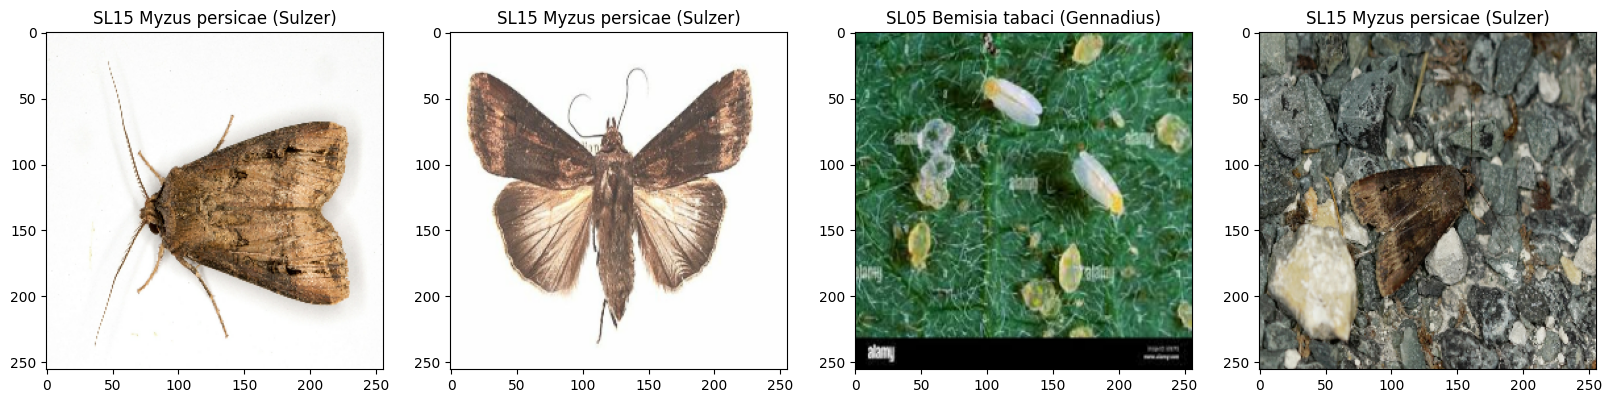

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    class_label = (batch[1][idx])
    ax[idx].title.set_text(class_names[class_label])

## 2. Processing 

##### 2.1 Scale data/image

In [59]:
# Scale Data
scaled = data.map(lambda x,y: (x/255, y))
scaled_iterator = scaled.as_numpy_iterator()
batch = scaled_iterator.next()

In [60]:
# Check if min/max for x (batch[0]) is 0 or 1
batch[0].max()

np.float32(1.0)

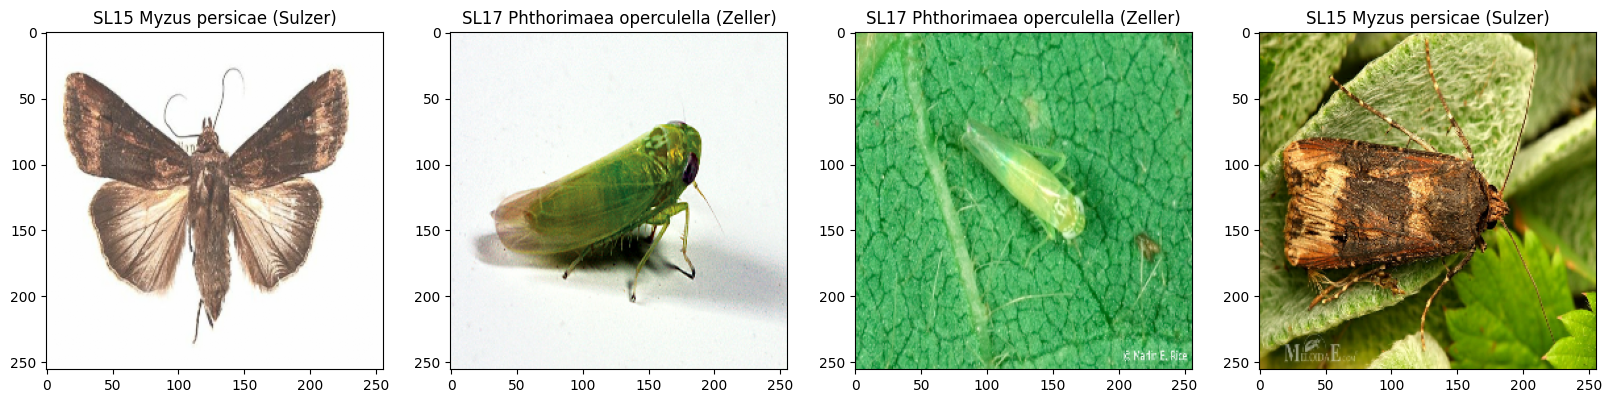

In [61]:
# Image refitting but using (img) and not "astype"
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    class_label = (batch[1][idx])
    ax[idx].title.set_text(class_names[class_label])

##### 2.2 Split data

In [62]:
# Check how many batches we have (total images / 32 and if it still has some images left, then add 1 batch)
len(scaled)

16

In [63]:
# Initiate sizing
train_size = int(len(scaled)*.7)+1
val_size = int(len(scaled)*.2)
test_size = int(len(scaled)*.1)

# Check the number
print(train_size)
print(val_size)
print(test_size)

12
3
1


In [64]:
# Initiate data allocation
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size + val_size).take(test_size)

# Check the size
print(len(train))
print(len(val))
print(len(test))

12
3
1


## 3. Deep Model

##### 3.1 Build Deep Learning Model

In [65]:
# Import the models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Make the model, layers, neruons stuff
model = Sequential()
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Check the summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

##### 3.2 Train

In [66]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
    train,
    epochs=10,
    validation_data=val,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.1513 - loss: -346.7233 - val_accuracy: 0.1458 - val_loss: -3509.7722
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.1096 - loss: -9782.2510 - val_accuracy: 0.2083 - val_loss: -43446.6719
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.1339 - loss: -105118.3828 - val_accuracy: 0.1146 - val_loss: -394002.5938
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.1030 - loss: -655700.0000 - val_accuracy: 0.1250 - val_loss: -2064136.3750
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.1238 - loss: -3154069.2500 - val_accuracy: 0.0938 - val_loss: -8595273.0000
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.1436 - loss: -12588025.0000 - val_accuracy: 0.1146 - val_loss: -24153174.0000
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.1025 - loss: -35701980.0000 - val_accuracy: 0.1354 - val_loss: -63493344.0000
Epoch 8/10
12/12 

##### 3.3 Plot Performance

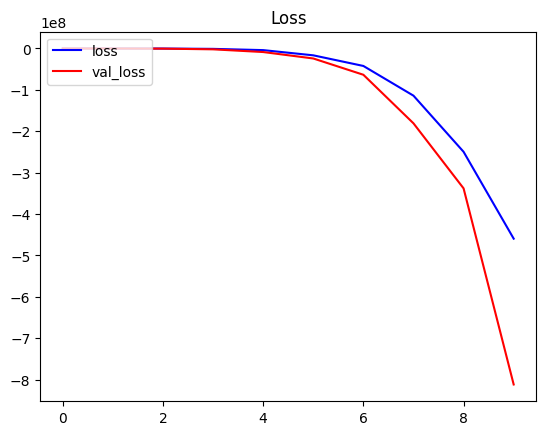

In [67]:
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

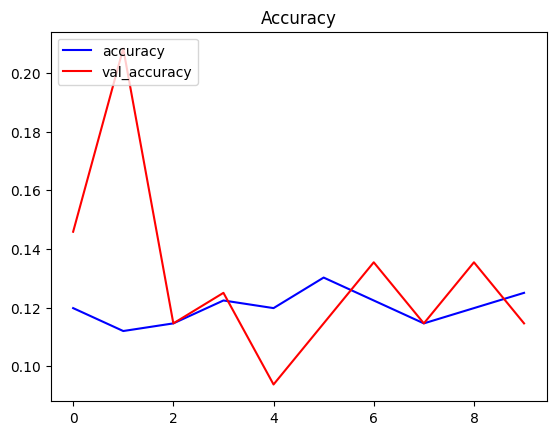

In [68]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.show()

## 4. Evaluate Performance

4.1 Evaluate

In [69]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy
# Define metrics
precision = Precision()
recall = Recall()
accuracy = SparseCategoricalAccuracy()

# Evaluate model on test data
for X, y in test.as_numpy_iterator():
    y_pred = model.predict(X)

    # Convert predictions to class indices
    y_pred = np.argmax(y_pred, axis=-1)

    # Update metrics
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

# Print results
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())
print("Accuracy:", accuracy.result().numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Precision: 0.0
Recall: 0.0
Accuracy: 0.14285715


4.2 Test

## 5. Save Model

5.1 Save Model

In [70]:
model.save('/mnt/data/potato_pest_classifier.h5')
print("Model saved successfully!")

Model saved successfully!
